# Business Problem 
### Problem Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

# Domain Analysis

## Importing Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [126]:
df=pd.read_csv("C:\Capstone Projects\indian_liver_patient.csv")

In [127]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [128]:
df1=df.copy()

## Basic Checks

In [129]:
df1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [131]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [8]:
!pip install sweetviz

import sweetviz as sv  # univarite analysis

my_report = sv.analyze(df1)  # pass the original datafarame

my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Selecting the numeric columns

In [132]:
num_col =["Age","Total_Bilirubin","Direct_Bilirubin","Alkaline_Phosphotase","Alamine_Aminotransferase","Aspartate_Aminotransferase","Total_Protiens","Albumin","Albumin_and_Globulin_Ratio"]

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [134]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Exploratory data analysis


## Distribution of Numerical Features

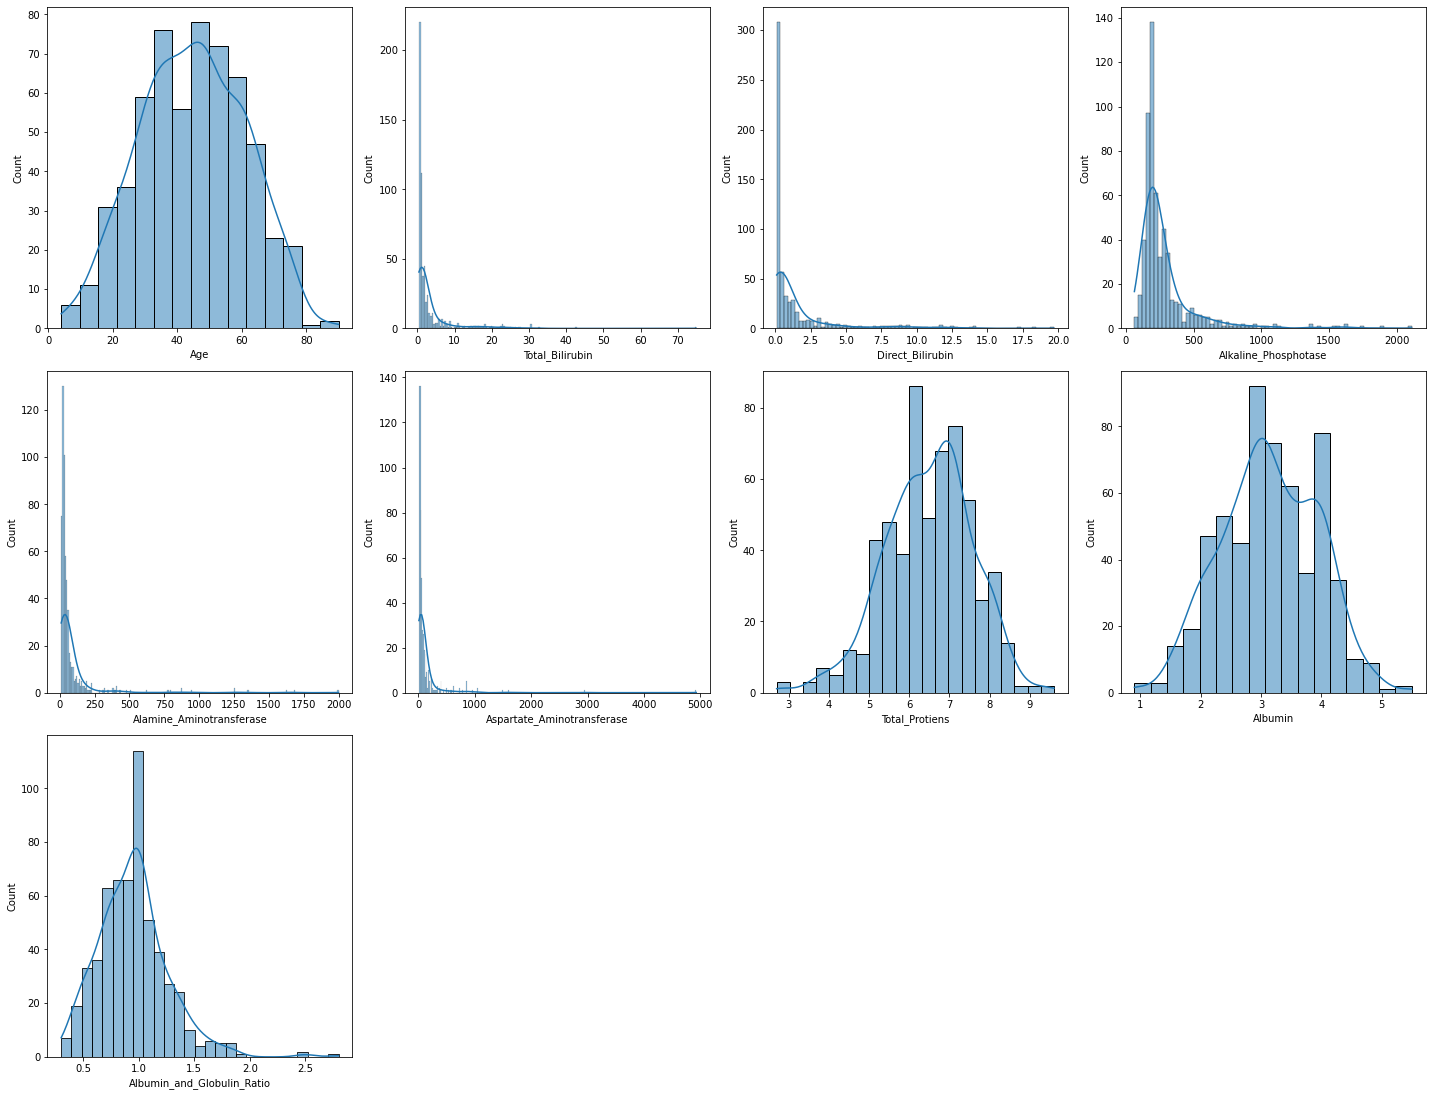

In [135]:
plt.figure(figsize=(20,25),facecolor='white')  # to set canvas
plotnumber=1 # counter

for column in num_col: # accessing the columns
    plt.subplot(5,4,plotnumber)
    sns.histplot(x=df1[column],kde=True)
    plt.xlabel(column) #assign name x axis 
    plt.ylabel('Count')
    plotnumber+=1 # counter increment
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Gender'>

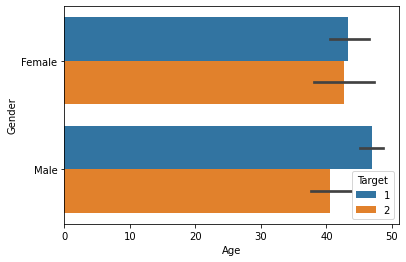

In [136]:
sns.barplot(x='Age',y='Gender',hue='Target',data=df1)

<AxesSubplot:xlabel='Gender', ylabel='count'>

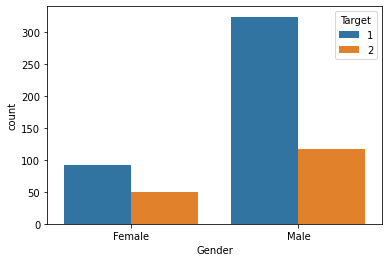

In [141]:
sns.countplot(x=df1["Gender"],hue=df1["Target"])

## Scatter plot to find the relationship between variables

In [142]:
df1.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [143]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df1['Target'] = lc.fit_transform(df1.Target)

In [144]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,0


<AxesSubplot:xlabel='Total_Bilirubin', ylabel='Direct_Bilirubin'>

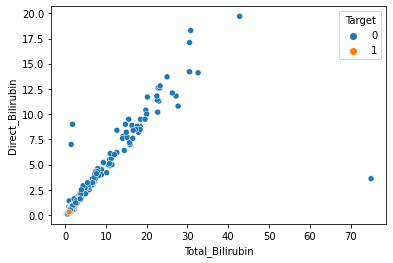

In [145]:
sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',data=df1,hue="Target")

In [146]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df1['Gender'] = lc.fit_transform(df1.Gender)

In [147]:
df1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


<AxesSubplot:xlabel='Albumin', ylabel='Total_Protiens'>

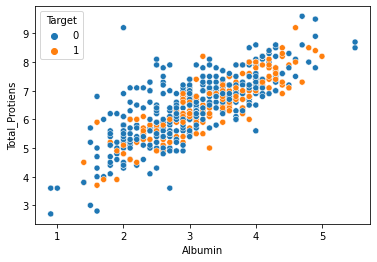

In [148]:
sns.scatterplot(x='Albumin',y='Total_Protiens',hue='Target',data=df1)

<AxesSubplot:xlabel='Albumin_and_Globulin_Ratio', ylabel='Albumin'>

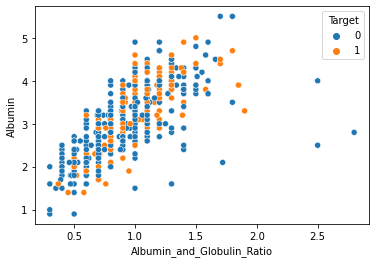

In [149]:
sns.scatterplot(x='Albumin_and_Globulin_Ratio',y='Albumin',hue='Target',data=df1)

# Data Preprocessing and Feature Engineering

## Data Cleaning

In [150]:
df1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [151]:
df1['Albumin_and_Globulin_Ratio'].fillna(df1.Albumin_and_Globulin_Ratio.mean(), inplace=True)
print(df1.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64


### Checking the duplicates

In [152]:
df1[df1.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,0
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.10,0
34,38,0,2.6,1.2,410,59,57,5.6,3.0,0.80,1
55,42,1,8.9,4.5,272,31,61,5.8,2.0,0.50,0
62,58,1,1.0,0.5,158,37,43,7.2,3.6,1.00,0
106,36,1,5.3,2.3,145,32,92,5.1,2.6,1.00,1
108,36,1,0.8,0.2,158,29,39,6.0,2.2,0.50,1
138,18,1,0.8,0.2,282,72,140,5.5,2.5,0.80,0
143,30,1,1.6,0.4,332,84,139,5.6,2.7,0.90,0
158,72,1,0.7,0.1,196,20,35,5.8,2.0,0.50,0


In [153]:
#df1.drop_duplicates(keep="first",inplace=True)
#df1

## Checking the outliers

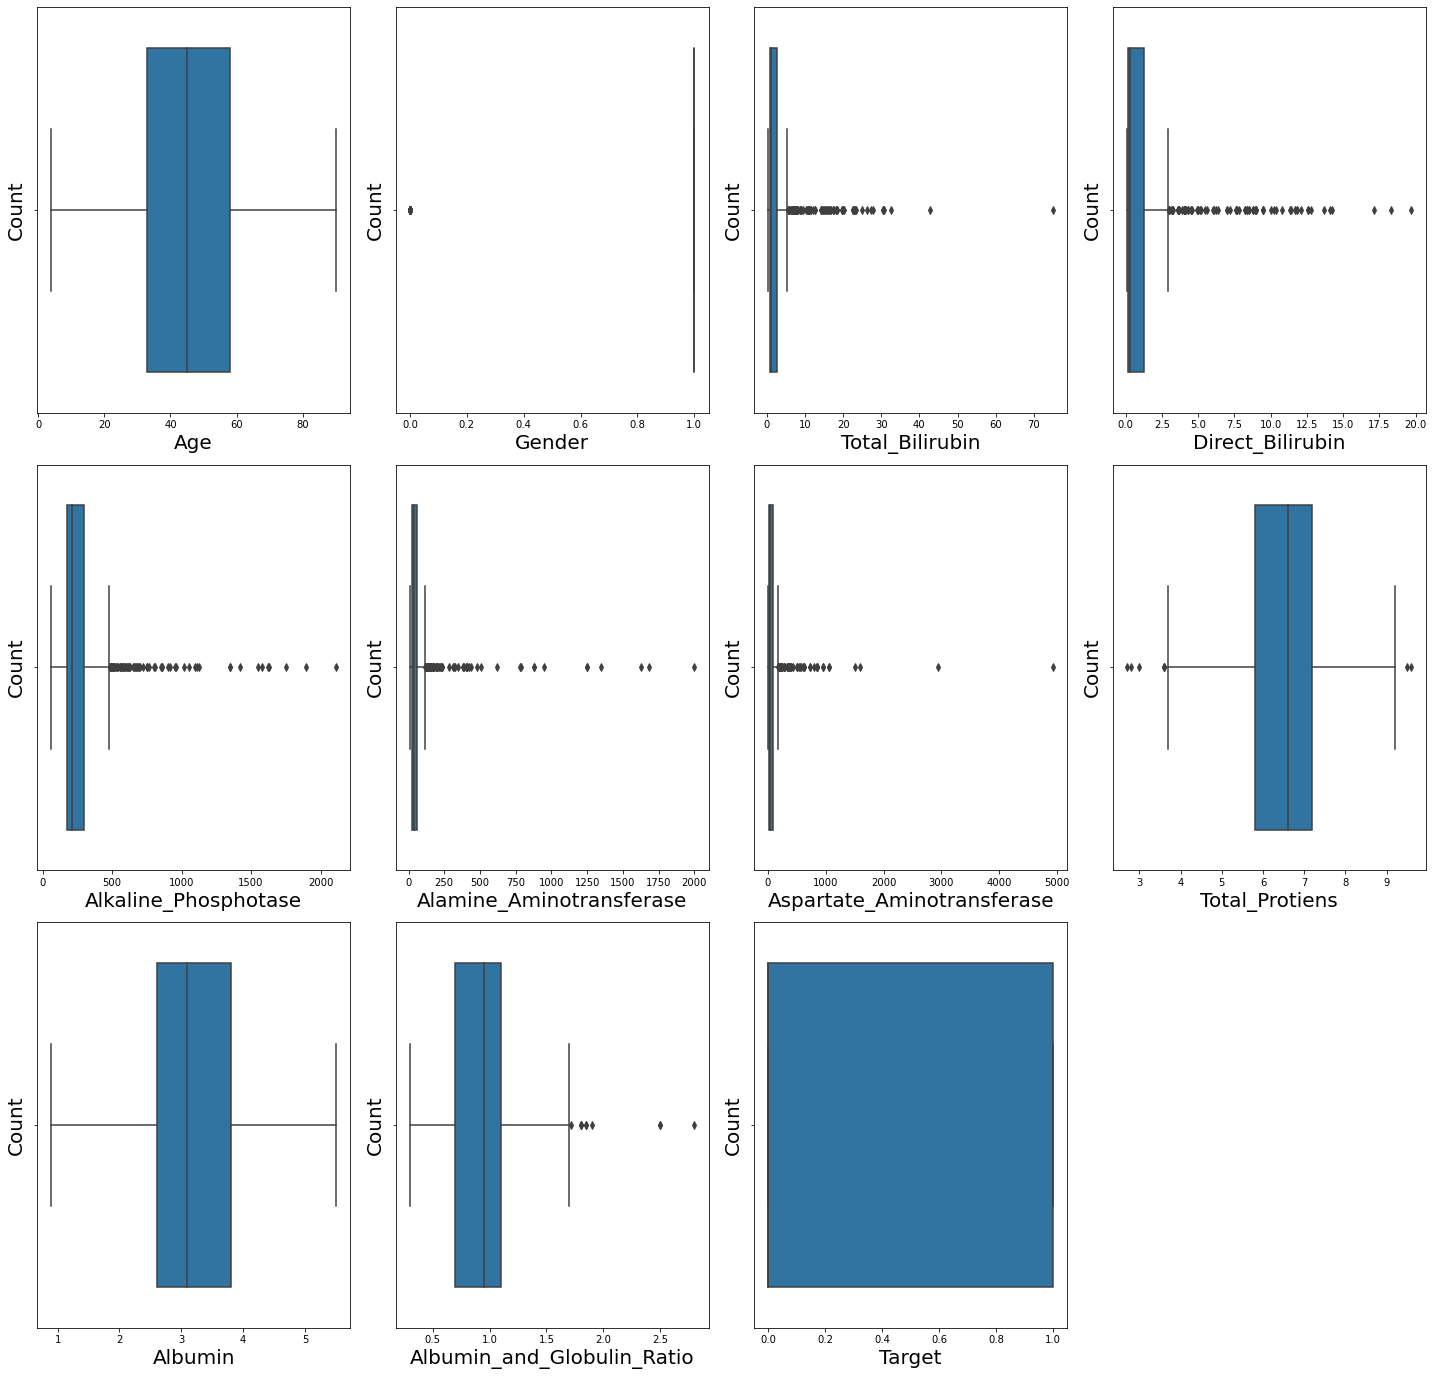

In [154]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df1:
    
    plt.subplot(4,4,plotnumber)
    sns.boxplot(df1[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

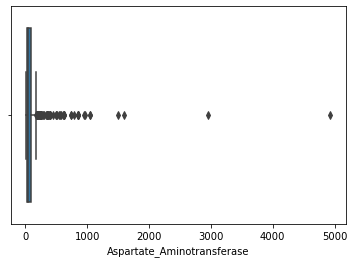

In [155]:
sns.boxplot(df1.Aspartate_Aminotransferase)

In [156]:
df1.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
119    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [157]:
df1.loc[df1.Aspartate_Aminotransferase >=2500]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
117,32,1,12.7,6.2,194,2000,2946,5.7,3.3,1.3,0
135,66,1,11.3,5.6,1110,1250,4929,7.0,2.4,0.5,0


In [158]:
df1 = df1[df1.Aspartate_Aminotransferase <=2500]
df1.shape

(581, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

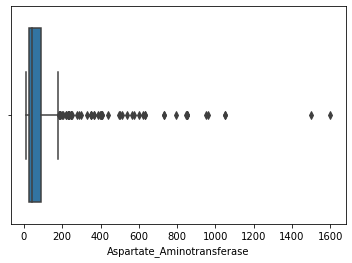

In [159]:
sns.boxplot(df1.Aspartate_Aminotransferase)

<AxesSubplot:xlabel='Total_Bilirubin'>

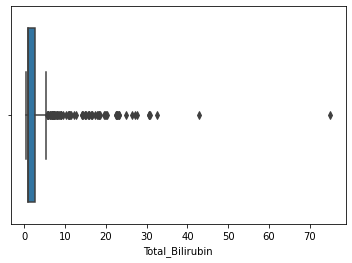

In [160]:
sns.boxplot(df1.Total_Bilirubin)

In [161]:
df1.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
504    30.5
Name: Total_Bilirubin, dtype: float64

In [162]:
df1 = df1[df1.Total_Bilirubin <=70]
df1.shape

(580, 11)

<AxesSubplot:xlabel='Total_Bilirubin'>

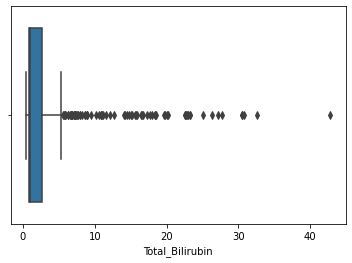

In [163]:
sns.boxplot(df1.Total_Bilirubin)

# Feature Engineering

# Correlations

Finally, let's take a look at the relationships between numeric features and other numeric features.

Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.

Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.

Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

Correlations near -1 or 1 indicate a strong relationship.

Those closer to 0 indicate a weak relationship.
0 indicates no relationship.

Text(0.5, 1.0, 'Correlation between the features')

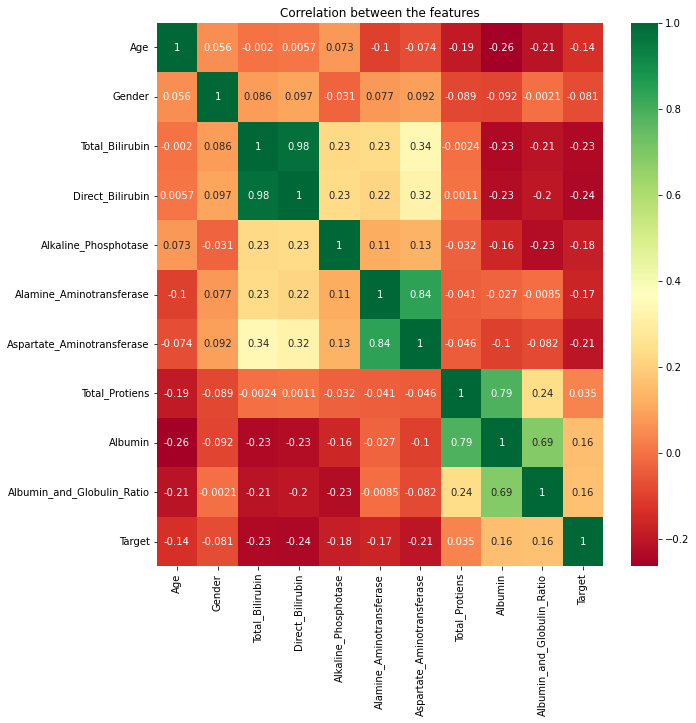

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap="RdYlGn")
plt.title("Correlation between the features")

In [165]:
df1.drop("Total_Bilirubin",axis=1,inplace=True)
df1

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,0,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,0.5,184,29,32,6.8,3.4,1.00,0


# Model Creation 

In [166]:
# Splitting x and y 
x=df1.drop('Target',axis=1)
y=df1[['Target']]

## Train Test data

In [167]:
# importing train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

### Smote

In [168]:
#from imblearn.over_sampling import SMOTE # smote means that sampling every class should be equalfor y training data
#sm= SMOTE()
#x_smote,y_smote = sm.fit_resample(x_train,y_train)

## Import the Classification Algorithms

In [169]:
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
import xgboost
from xgboost import XGBClassifier


models = []   #  list with models

models.append(('DT  ', DecisionTreeClassifier()))
models.append(('NB  ', GaussianNB()))
models.append(('KNN ', KNeighborsClassifier(n_neighbors=2)))
models.append(('LR  ', LogisticRegression(solver='liblinear')))
models.append(('RF  ', RandomForestClassifier()))
models.append(('SVM ', SVC(gamma='auto')))
models.append(('GB  ', GradientBoostingClassifier()))
models.append(('XGB ', XGBClassifier()))

models.sort()
for i in models:
    print(i)

('DT  ', DecisionTreeClassifier())
('GB  ', GradientBoostingClassifier())
('KNN ', KNeighborsClassifier(n_neighbors=2))
('LR  ', LogisticRegression(solver='liblinear'))
('NB  ', GaussianNB())
('RF  ', RandomForestClassifier())
('SVM ', SVC(gamma='auto'))
('XGB ', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_s

## Import the metrics

In [170]:
# Machine Learning Evaluation for Classification Models
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# create and initialize lists for dataframe
list_name, list_model = ([] for i in range(2))
list_CM, list_TN, list_FP, list_FN, list_TP = ([] for i in range(5))
list_AC, list_RC, list_PS, list_F1 = ([] for i in range(4))
list_CVS, list_AUC = ([] for i in range(2))

In [171]:
#  Evaluate the Models:
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    list_name.append(name)    # model names
    list_model.append(str(model).split("(")[0])
    
    # confusion matrix values
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[1][1]  # True Negative  (Top-Left Quadrant)
    FP = CM[0][1]  # False Positive (Top-Right Quadrant)
    FN = CM[1][0]  # False Negative (Bottom-Left Quadrant)
    TP = CM[0][0]  # True Positive  (Bottom-Right Quadrant)
    
    list_CM.append(CM)  # confusion_matrix
    list_TN.append(TN)  # True Negative  (Top-Left Quadrant)
    list_FP.append(FP)  # False Positive (Top-Right Quadrant)
    list_FN.append(FN)  # False Negative (Bottom-Left Quadrant)
    list_TP.append(TP)  # True Positive  (Bottom-Right Quadrant)
    
    list_AC.append(accuracy_score(y_test, y_pred))    # accuracy_score
    list_RC.append(recall_score(y_test, y_pred))      # recall
    list_PS.append(precision_score(y_test, y_pred))   # precision
    list_F1.append(f1_score(y_test, y_pred))          # F1 score
    list_CVS.append(cross_val_score(model, x, y, cv = 5, scoring = 'accuracy').mean())  # cross-validation score

    #  area under curve
    model.probability = True   # need for predict_proba to work
    model.fit(x_train,y_train)
    y_preda = model.predict_proba(x_test)
    y_preda = y_preda[:,1]   # positive values only
    list_AUC.append(roc_auc_score(y_test, y_preda))
    
    print('evalute metrics for:\t', name)

evalute metrics for:	 DT  
evalute metrics for:	 GB  
evalute metrics for:	 KNN 
evalute metrics for:	 LR  
evalute metrics for:	 NB  
evalute metrics for:	 RF  
evalute metrics for:	 SVM 
evalute metrics for:	 XGB 


In [172]:
#  fill out the model dataframe
df_metrics = pd.DataFrame()

df_metrics['name'] = list_name
df_metrics['model'] = list_model

df_metrics['ConfusionMatrix'] = list_CM
df_metrics['TN'] = list_TN
df_metrics['FP'] = list_FP
df_metrics['FN'] = list_FN
df_metrics['TP'] = list_TP

df_metrics['AccuracyScore'] = list_AC
df_metrics['Recall'] = list_RC
df_metrics['Precision'] = list_PS
df_metrics['F1Score'] = list_F1

df_metrics['AUC'] = list_AUC
df_metrics['CrossValidation'] = list_CVS

print(df_metrics)
print(df_metrics.columns)

   name                       model       ConfusionMatrix  TN  FP  FN  TP  \
0  DT        DecisionTreeClassifier   [[69, 14], [24, 9]]   9  14  24  69   
1  GB    GradientBoostingClassifier  [[70, 13], [21, 12]]  12  13  21  70   
2  KNN         KNeighborsClassifier    [[76, 7], [26, 7]]   7   7  26  76   
3  LR            LogisticRegression    [[79, 4], [26, 7]]   7   4  26  79   
4  NB                    GaussianNB   [[28, 55], [2, 31]]  31  55   2  28   
5  RF        RandomForestClassifier   [[74, 9], [23, 10]]  10   9  23  74   
6  SVM                          SVC    [[83, 0], [33, 0]]   0   0  33  83   
7  XGB                XGBClassifier  [[67, 16], [20, 13]]  13  16  20  67   

   AccuracyScore    Recall  Precision   F1Score       AUC  CrossValidation  
0       0.672414  0.272727   0.391304  0.321429  0.539978         0.631034  
1       0.706897  0.363636   0.480000  0.413793  0.719971         0.672414  
2       0.715517  0.212121   0.500000  0.297872  0.699708         0.689655 

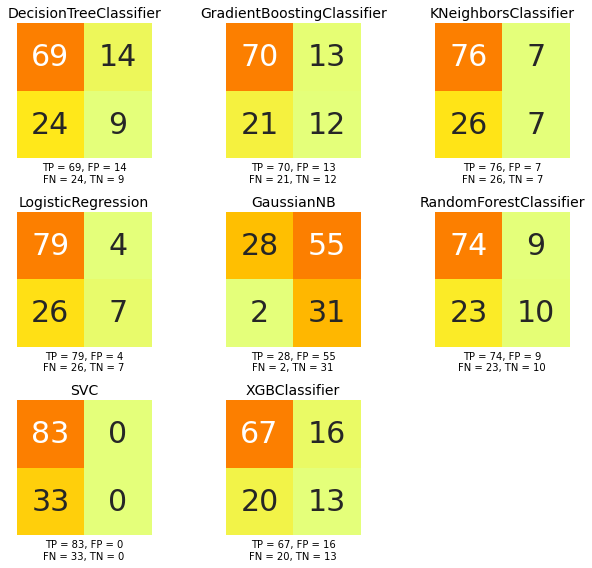

In [173]:

#  plot Confusion Matrix
c = 1  # subplot counter
fig = plt.figure(figsize=(9,8))

for i in range(len(df_metrics)):
    #  get values from dataframe
    mod_name  = df_metrics['model'].loc[i]
    conf_matx = df_metrics['ConfusionMatrix'].loc[i]

    # confusion matrix values
    TN = df_metrics['TN'].loc[i]  # True Negative (Top-Left Quadrant)
    FP = df_metrics['FP'].loc[i]  # False Positive (Top-Right Quadrant)
    FN = df_metrics['FN'].loc[i]  # False Negative (Bottom-Left Quadrant)
    TP = df_metrics['TP'].loc[i]  # True Positive (Bottom-Right Quadrant)
    
    # plot confusion matrix in dataframe
    plt.subplot(3, 3, c)
    sns.heatmap(conf_matx, annot=True, cbar = False, annot_kws={"size": 30}, cmap = 'Wistia', square = True)
    plt.title(mod_name, fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('TP = {}, FP = {}\nFN = {}, TN = {}'.format(TP,FP,FN,TN))
    c = c + 1

plt.tight_layout()
plt.show()

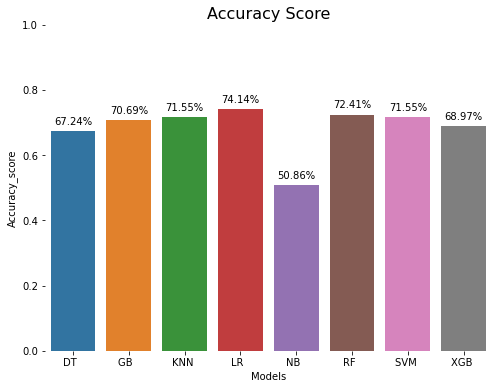

In [174]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'AccuracyScore')
plt.title('Accuracy Score', fontsize = 16)
plt.xlabel("Models")
plt.ylabel("Accuracy_score")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

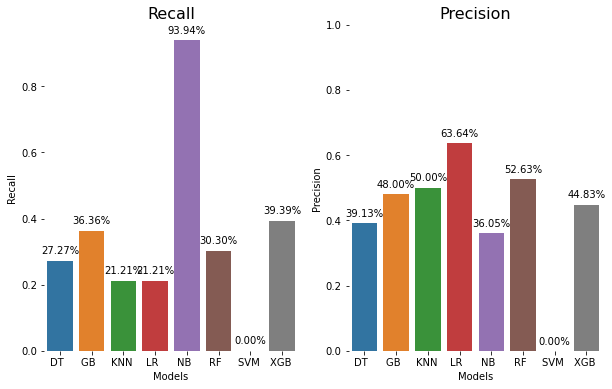

In [175]:
fig = plt.figure(figsize=(10,6))
plt.subplot(121)   # recall
ax = sns.barplot(data = df_metrics, x = 'name', y = 'Recall')
plt.title('Recall', fontsize = 16)
plt.xlabel("Models")
plt.ylabel("Recall")
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')

plt.subplot(122)   # precision
ax = sns.barplot(data = df_metrics, x = 'name', y = 'Precision')
plt.title('Precision', fontsize = 16)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

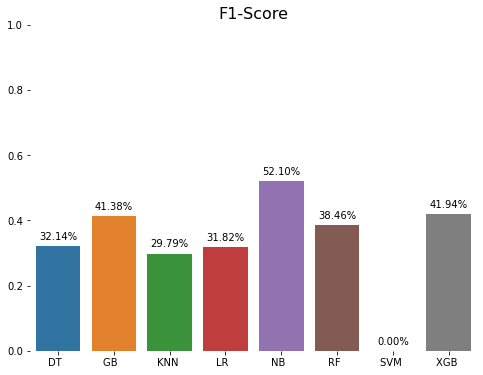

In [176]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'F1Score')
plt.title('F1-Score', fontsize = 16)
plt.xlabel("")
plt.ylabel("")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

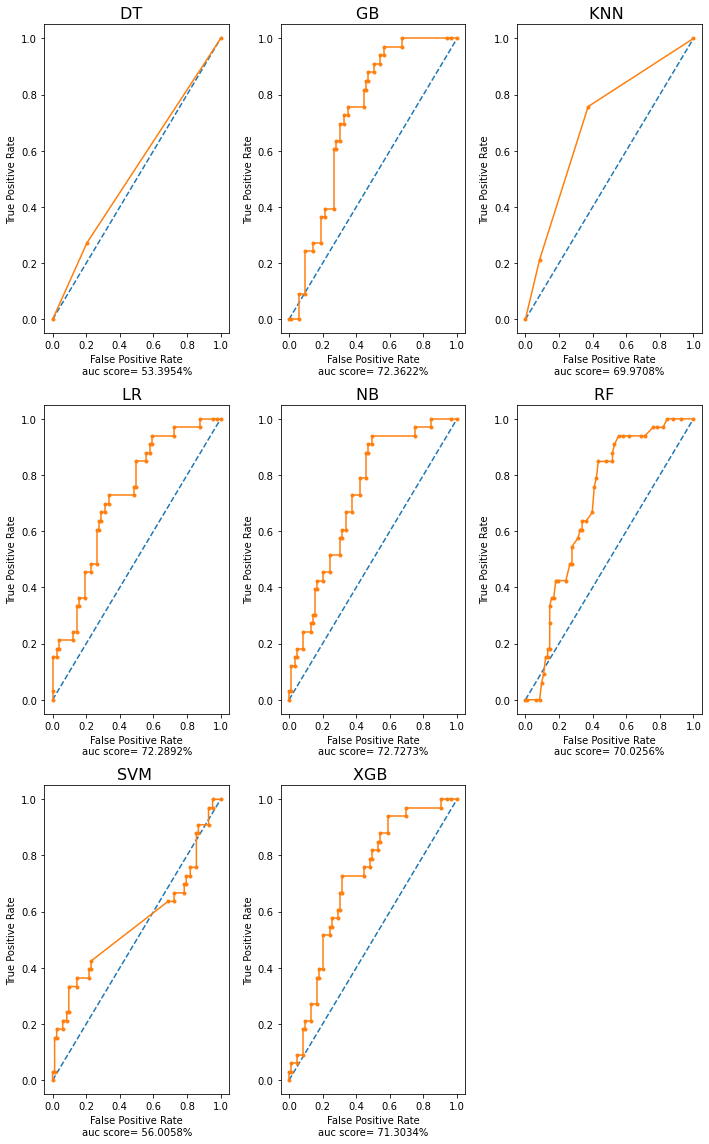

In [181]:
#  ROC plot
c = 1  # subplot counter
fig = plt.figure(figsize=(10,16))

for name, model in models:
    model.probability = True   # need for predict_proba to work
    model.fit(x_train,y_train)
    y_preda = model.predict_proba(x_test)
    y_preda = y_preda[:,1]   # positive values only

    AUC = roc_auc_score(y_test, y_preda)               # AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_preda)  # ROC

    #  plot ROC and AUC
    plt.subplot(3, 3, c)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title("{}".format(name), fontsize = 16)
    plt.xlabel('False Positive Rate\nauc score= {:3.4%}'.format(AUC))
    plt.ylabel('True Positive Rate')
    
    c = c + 1

plt.tight_layout()
plt.show()

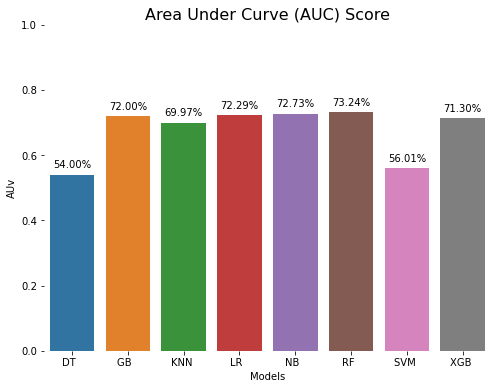

In [179]:
# plot
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'AUC')
plt.title('Area Under Curve (AUC) Score', fontsize = 16)
plt.xlabel("Models")
plt.ylabel("AUv")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()

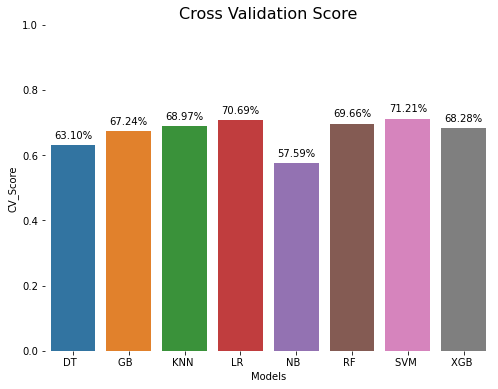

In [180]:
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_metrics, x = 'name', y = 'CrossValidation')
plt.title('Cross Validation Score', fontsize = 16)
plt.xlabel("Models")
plt.ylabel("CV_Score")
plt.ylim([0,1])
plt.box(False)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()*100), (p.get_x() + p.get_width()/2, p.get_height()+0.03), ha='center', va='center')
plt.show()